# Lectura de datos

Abriendo el archivo de la forma mas simple posible

In [28]:
f = open('../../data/3116406.txt', 'r')


Antes de continuar vamos a quitarle el encabezado y guardarlo para despues 

In [29]:
encabezado = next(f).split()
next(f)  ## comando next????

print(encabezado)

['STATION', 'STATION_NAME', 'DATE', 'PRCP', 'TAVG', 'TMAX', 'TMIN']


Organizando los datos en una lista

In [30]:

dato = []
for line in f:
    dato.append(line.split())

print(dato[:10])

[['GHCND:PEM00084691', 'PISCO', 'INTERNATIONAL', 'PE', '19630301', '-9999', '23.3', '27.2', '-9999'], ['GHCND:PEM00084691', 'PISCO', 'INTERNATIONAL', 'PE', '19630302', '-9999', '22.5', '27.8', '17.2'], ['GHCND:PEM00084691', 'PISCO', 'INTERNATIONAL', 'PE', '19630303', '-9999', '21.3', '26.1', '16.1'], ['GHCND:PEM00084691', 'PISCO', 'INTERNATIONAL', 'PE', '19630304', '-9999', '21.1', '26.1', '17.2'], ['GHCND:PEM00084691', 'PISCO', 'INTERNATIONAL', 'PE', '19630305', '-9999', '22.7', '27.2', '17.2'], ['GHCND:PEM00084691', 'PISCO', 'INTERNATIONAL', 'PE', '19630306', '-9999', '21.7', '27.2', '17.2'], ['GHCND:PEM00084691', 'PISCO', 'INTERNATIONAL', 'PE', '19630307', '-9999', '22.4', '26.1', '17.8'], ['GHCND:PEM00084691', 'PISCO', 'INTERNATIONAL', 'PE', '19630308', '-9999', '21.3', '26.1', '16.1'], ['GHCND:PEM00084691', 'PISCO', 'INTERNATIONAL', 'PE', '19630309', '-9999', '21.5', '27.2', '17.8'], ['GHCND:PEM00084691', 'PISCO', 'INTERNATIONAL', 'PE', '19630310', '-9999', '23.4', '-9999', '17.2'

Pasando de una lista a un `DataFrame`

In [31]:
import pandas as pd

In [32]:
df = pd.DataFrame(dato, columns=encabezado)

#que paso?

ValueError: 7 columns passed, passed data had 9 columns

Nuestro problema es el número de colmnas, entonces tenemos que verificar la cantidad de elementos en cada lista que esta dentro de nuestra variable `dato`.

In [6]:
dato[0]

['GHCND:PEM00084691',
 'PISCO',
 'INTERNATIONAL',
 'PE',
 '19630301',
 '-9999',
 '23.3',
 '27.2',
 '-9999']

Veamos que es lo que tenemos en nuestro encabezado

In [7]:
encabezado

['STATION', 'STATION_NAME', 'DATE', 'PRCP', 'TAVG', 'TMAX', 'TMIN']

In [8]:
encabezado.insert(1, 'Station name')
encabezado.insert(1, 'Station name')

In [9]:
# verificando lo que tenemos ahora
print(encabezado)

['STATION', 'Station name', 'Station name', 'STATION_NAME', 'DATE', 'PRCP', 'TAVG', 'TMAX', 'TMIN']


Ahora que ya tenemos la cantidad de columnas completas, le decimos cual es la forma correcta de dejarlo como un `DataFrame`

In [10]:
df = pd.DataFrame(dato, columns=encabezado)

Ahora veamos que pasa con nuestro `DataFrame`

In [11]:
print(df.head())
# hay algun problema?

             STATION Station name   Station name STATION_NAME      DATE  \
0  GHCND:PEM00084691        PISCO  INTERNATIONAL           PE  19630301   
1  GHCND:PEM00084691        PISCO  INTERNATIONAL           PE  19630302   
2  GHCND:PEM00084691        PISCO  INTERNATIONAL           PE  19630303   
3  GHCND:PEM00084691        PISCO  INTERNATIONAL           PE  19630304   
4  GHCND:PEM00084691        PISCO  INTERNATIONAL           PE  19630305   

    PRCP  TAVG  TMAX   TMIN  
0  -9999  23.3  27.2  -9999  
1  -9999  22.5  27.8   17.2  
2  -9999  21.3  26.1   16.1  
3  -9999  21.1  26.1   17.2  
4  -9999  22.7  27.2   17.2  


In [12]:
import numpy as np
df = df.replace('-9999', np.nan)

df

,STATION,Station name,Station name,STATION_NAME,DATE,PRCP,TAVG,TMAX,TMIN
0,GHCND:PEM00084691,PISCO,INTERNATIONAL,PE,19630301,NaN,23.3,27.2,NaN
1,GHCND:PEM00084691,PISCO,INTERNATIONAL,PE,19630302,NaN,22.5,27.8,17.2
2,GHCND:PEM00084691,PISCO,INTERNATIONAL,PE,19630303,NaN,21.3,26.1,16.1
3,GHCND:PEM00084691,PISCO,INTERNATIONAL,PE,19630304,NaN,21.1,26.1,17.2
4,GHCND:PEM00084691,PISCO,INTERNATIONAL,PE,19630305,NaN,22.7,27.2,17.2
...,...,...,...,...,...,...,...,...,...
16682,GHCND:PEM00084691,PISCO,INTERNATIONAL,PE,20211027,NaN,17.1,NaN,NaN
16683,GHCND:PEM00084691,PISCO,INTERNATIONAL,PE,20211028,NaN,16.7,NaN,12.9
16684,GHCND:PEM00084691,PISCO,INTERNATIONAL,PE,20211029,NaN,17.3,NaN,13.8
16685,GHCND:PEM00084691,PISCO,INTERNATIONAL,PE,20211030,NaN,16.9,NaN,NaN


In [13]:
df.TMAX[0]

'27.2'

<AxesSubplot: >

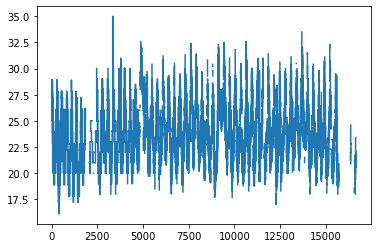

In [14]:
df.TMAX.astype('float').plot()

Recuerda cerrar el archivo siempre, porque sino permanece en la memoria.

In [15]:
f.close()

Ya que vimos como se hace entonces ahora hagamoslo de forma mas simple

In [16]:
f = open('../../data/3116406.txt', 'r')

encabezado = next(f).split()
next(f)  ## comando next????
dato = []
for line in f:
    d_line = line.split()
    if '-9999' in d_line:
        d_line = list(map(lambda x: x.replace('-9999', 'NaN'), d_line))
    dato.append(d_line)

f.close() # no se olviden de cerrar el archivo

encabezado.insert(1, 'Station name')
encabezado.insert(1, 'Station name')

df = pd.DataFrame(dato, columns=encabezado)

In [17]:
df

,STATION,Station name,Station name,STATION_NAME,DATE,PRCP,TAVG,TMAX,TMIN
0,GHCND:PEM00084691,PISCO,INTERNATIONAL,PE,19630301,NaN,23.3,27.2,NaN
1,GHCND:PEM00084691,PISCO,INTERNATIONAL,PE,19630302,NaN,22.5,27.8,17.2
2,GHCND:PEM00084691,PISCO,INTERNATIONAL,PE,19630303,NaN,21.3,26.1,16.1
3,GHCND:PEM00084691,PISCO,INTERNATIONAL,PE,19630304,NaN,21.1,26.1,17.2
4,GHCND:PEM00084691,PISCO,INTERNATIONAL,PE,19630305,NaN,22.7,27.2,17.2
...,...,...,...,...,...,...,...,...,...
16682,GHCND:PEM00084691,PISCO,INTERNATIONAL,PE,20211027,NaN,17.1,NaN,NaN
16683,GHCND:PEM00084691,PISCO,INTERNATIONAL,PE,20211028,NaN,16.7,NaN,12.9
16684,GHCND:PEM00084691,PISCO,INTERNATIONAL,PE,20211029,NaN,17.3,NaN,13.8
16685,GHCND:PEM00084691,PISCO,INTERNATIONAL,PE,20211030,NaN,16.9,NaN,NaN


In [18]:
df.index = df.DATE.apply(pd.to_datetime)
tmax = df.TMAX.astype('float')

In [19]:
df.head()

,STATION,Station name,Station name,STATION_NAME,DATE,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,,,,
1963-03-01,GHCND:PEM00084691,PISCO,INTERNATIONAL,PE,19630301,NaN,23.3,27.2,NaN
1963-03-02,GHCND:PEM00084691,PISCO,INTERNATIONAL,PE,19630302,NaN,22.5,27.8,17.2
1963-03-03,GHCND:PEM00084691,PISCO,INTERNATIONAL,PE,19630303,NaN,21.3,26.1,16.1
1963-03-04,GHCND:PEM00084691,PISCO,INTERNATIONAL,PE,19630304,NaN,21.1,26.1,17.2
1963-03-05,GHCND:PEM00084691,PISCO,INTERNATIONAL,PE,19630305,NaN,22.7,27.2,17.2


In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16687 entries, 1963-03-01 to 2021-10-31
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   STATION       16687 non-null  object
 1   Station name  16687 non-null  object
 2   Station name  16687 non-null  object
 3   STATION_NAME  16687 non-null  object
 4   DATE          16687 non-null  object
 5   PRCP          16687 non-null  object
 6   TAVG          16687 non-null  object
 7   TMAX          16687 non-null  object
 8   TMIN          16687 non-null  object
dtypes: object(9)
memory usage: 1.3+ MB


<AxesSubplot: xlabel='DATE'>

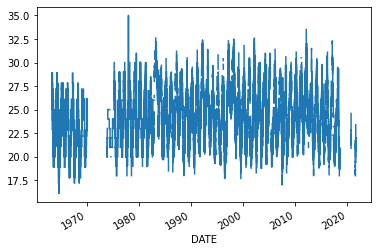

In [21]:
tmax.plot()

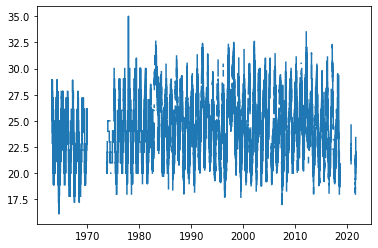

In [22]:
from matplotlib import pyplot as plt

plt.plot(tmax)

## Pandas llegando a la ayuda!

In [23]:
df  = pd.read_fwf('../../data/3116406.txt', skiprows=2, 
                  header=None, na_values='-9999')
df.head()

,0,1,2,3,4,5,6,7,8
0,GHCND:PEM00084691,PISCO,INTERNATIONAL,PE,19630301,NaN,23.3,27.2,NaN
1,GHCND:PEM00084691,PISCO,INTERNATIONAL,PE,19630302,NaN,22.5,27.8,17.2
2,GHCND:PEM00084691,PISCO,INTERNATIONAL,PE,19630303,NaN,21.3,26.1,16.1
3,GHCND:PEM00084691,PISCO,INTERNATIONAL,PE,19630304,NaN,21.1,26.1,17.2
4,GHCND:PEM00084691,PISCO,INTERNATIONAL,PE,19630305,NaN,22.7,27.2,17.2


Debido a que le pedimos al `pandas` a abrir olvidando el encabezado tenemos que reasignar los nombres de columnas.

In [24]:
df.columns =['STATION', 'CITY', 'INTER', 'COUNTRY', 'DATE', 'PRCP',
             'TAVG', 'TMAX', 'TMIN']
df.index = pd.to_datetime(df['DATE'], format="%Y%m%d")
df.head()

,STATION,CITY,INTER,COUNTRY,DATE,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,,,,
1963-03-01,GHCND:PEM00084691,PISCO,INTERNATIONAL,PE,19630301,NaN,23.3,27.2,NaN
1963-03-02,GHCND:PEM00084691,PISCO,INTERNATIONAL,PE,19630302,NaN,22.5,27.8,17.2
1963-03-03,GHCND:PEM00084691,PISCO,INTERNATIONAL,PE,19630303,NaN,21.3,26.1,16.1
1963-03-04,GHCND:PEM00084691,PISCO,INTERNATIONAL,PE,19630304,NaN,21.1,26.1,17.2
1963-03-05,GHCND:PEM00084691,PISCO,INTERNATIONAL,PE,19630305,NaN,22.7,27.2,17.2


In [25]:
df.TMIN[1]

17.2

<AxesSubplot: xlabel='DATE'>

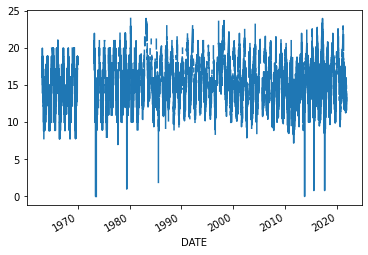

In [26]:
df.TMIN.plot()

## Retornar al [indice](./../indice.md)